# **Data cleaning and preprocessing**

## Import packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True) 

## Import Dataset

In [14]:
turkey_daily_climate = pd.read_csv("turkey_daily_climate_data_2010_2015.csv",keep_default_na=False,na_values=['N/A*'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (9,10,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


| City                                      | City name from Turkey                                                  |
|-------------------------------------------|------------------------------------------------------------------------|
| **Year**                                      | Year of the record                                                     |
| **Month**                                     | Month of the record                                                    |
| **Day**                                       | Day of the record                                                      |
| **Temperature avarage, Fahrenheit / Celsius** | The average temperature of the daily record in Fahrenheit and Celcius  |
| **Temperature maximum, Fahrenheit / Celsius** | The maximum temperature of the daily record in Fahrenheit and Celcius  |
| **Temperature minimum, Fahrenheit / Celsius** | The minimum temperature of the daily record in Fahrenheit and Celcius  |
| **Precipitation in / cm**                     | The precipitation of the daily record in cantimeter                    |
| **Average daily wind speed (miles/hour)**     | The average wind of the daily record in miles and hours                |
| **Visibility in miles**                       | The visibility in miles of the daily record                            |
| **Dew point, Fahrenheit / Celsius**           | The dew point of the daily record in Fahrenheit and Celcius            |
| **Maximum sustained wind speed (miles/hour)** | The maximum sustained wind speed of the daily record in miles and hour |
| **Maximum wind gust reported for the day**    | The maximum wind gust of the daily record                              |
| **Sea level pressure in mBARs**               | The sea level of the daily record in mBARs                             |
| **Station pressure in mBARs**                 | Station pressure of the daily record in mBARs                          |
| **Snow depth in inches**                      | The snow depth of the daily record in inches                           |
| **Weather type**                              | The wheather type                                                      |
                                      

In [4]:
turkey_daily_climate.head(3)

,Unnamed: 0,City,Year,Month,Day,"Temperature avarage, Fahrenheit / Celsius","Temperature maximum, Fahrenheit / Celsius","Temperature minimum, Fahrenheit / Celsius",Precipitation in / cm,Average daily wind speed (miles/hour),Visibility in miles,"Dew point, Fahrenheit / Celsius",Maximum sustained wind speed (miles/hour),Maximum wind gust reported for the day,Sea level pressure in mBARs,Station pressure in mBARs,Snow depth in inches,Weather type
0,0,Adana,2010,"01,02",1,57.0/13.9,66.2/19.0,44.6/7.0,NaN,3.8,6.0,47.8/8.8,10.24,NaN,NaN,NaN,NaN,NaN
1,1,Adana,2010,"01,02",2,59.2/15.1,66.2/19.0,51.8/11.0,NaN,4.6,6.0,53.2/11.8,16.11,NaN,NaN,NaN,NaN,Rain/Drizzle
2,2,Adana,2010,"01,02",3,60.7/15.9,68.0/20.0,53.6/12.0,NaN,7.25,5.0,42.8/6.0,16.11,NaN,NaN,NaN,NaN,Rain/Drizzle


## Descriptive statistics of data

In [5]:
turkey_daily_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83912 entries, 0 to 83911
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Unnamed: 0                                 83912 non-null  int64 
 1   City                                       83912 non-null  object
 2   Year                                       83912 non-null  int64 
 3   Month                                      83912 non-null  object
 4   Day                                        83912 non-null  int64 
 5   Temperature avarage, Fahrenheit / Celsius  83912 non-null  object
 6   Temperature maximum, Fahrenheit / Celsius  83912 non-null  object
 7   Temperature minimum, Fahrenheit / Celsius  83912 non-null  object
 8   Precipitation in / cm                      37278 non-null  object
 9   Average daily wind speed (miles/hour)      80462 non-null  object
 10  Visibility in miles               

In [15]:
turkey_daily_climate["Average daily wind speed (miles/hour)"] = pd.to_numeric(turkey_daily_climate["Average daily wind speed (miles/hour)"])
turkey_daily_climate["Visibility in miles"] = pd.to_numeric(turkey_daily_climate["Visibility in miles"])
turkey_daily_climate["Maximum sustained wind speed (miles/hour)"] = pd.to_numeric(turkey_daily_climate["Maximum sustained wind speed (miles/hour)"])
turkey_daily_climate["Maximum wind gust reported for the day"] = pd.to_numeric(turkey_daily_climate["Maximum wind gust reported for the day"])

In [16]:
turkey_daily_climate.drop(columns = ['Unnamed: 0','Sea level pressure in mBARs', 'Station pressure in mBARs', 'Snow depth in inches'], inplace = True)

In [10]:
turkey_daily_climate.head(2)

,City,Year,Month,Day,"Temperature avarage, Fahrenheit / Celsius","Temperature maximum, Fahrenheit / Celsius","Temperature minimum, Fahrenheit / Celsius",Precipitation in / cm,Average daily wind speed (miles/hour),Visibility in miles,"Dew point, Fahrenheit / Celsius",Maximum sustained wind speed (miles/hour),Maximum wind gust reported for the day,Weather type
0,Adana,2010,"01,02",1,57.0/13.9,66.2/19.0,44.6/7.0,NaN,3.8,6.0,47.8/8.8,10.24,NaN,NaN
1,Adana,2010,"01,02",2,59.2/15.1,66.2/19.0,51.8/11.0,NaN,4.6,6.0,53.2/11.8,16.11,NaN,Rain/Drizzle


In [17]:
turkey_daily_climate.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,83912.0,2012.481933,1.707749,2010.00,2011.00,2012.00,2014.00,2015.00
Day,83912.0,15.821778,8.845697,1.00,8.00,16.00,23.00,31.00
Average daily wind speed (miles/hour),80461.0,5.629547,2.035604,1.61,4.37,5.41,6.33,18.87
Visibility in miles,80396.0,5.710098,1.133966,1.00,5.00,6.00,6.00,7.00
Maximum sustained wind speed (miles/hour),80461.0,13.138127,3.771372,4.72,10.24,12.77,14.96,32.22
Maximum wind gust reported for the day,3148.0,29.888332,7.446020,16.11,24.17,29.92,34.41,52.94


In [19]:
turkey_daily_climate.duplicated().sum()

0

In [21]:
turkey_daily_climate.isnull().sum()

City                                             0
Year                                             0
Month                                            0
Day                                              0
Temperature avarage, Fahrenheit / Celsius        0
Temperature maximum, Fahrenheit / Celsius        0
Temperature minimum, Fahrenheit / Celsius        0
Precipitation in / cm                        46634
Average daily wind speed (miles/hour)         3451
Visibility in miles                           3516
Dew point, Fahrenheit / Celsius                  0
Maximum sustained wind speed (miles/hour)     3451
Maximum wind gust reported for the day       80764
Weather type                                 66631
dtype: int64

City

In [22]:
turkey_daily_climate.City.unique()

array(['Adana', 'Adiyaman', 'Afyonkarahisar', 'Agri', 'Amasya',
       'Ankara/Central', 'Antalya', 'Artvin', 'Aydin', 'Balikesir',
       'Bilecik', 'Bingol', 'Bolu', 'Burdur', 'Bursa', 'Canakkale',
       'Cankiri', 'Corum', 'Denizli', 'Diyarbakir', 'Edirne', 'Elazig',
       'Erzincan', 'Erzurum', 'Eskisehir', 'Gap', 'Sanliurfa', 'Giresun',
       'Gumushane', 'Hakkari', 'Hatay', 'Isparta', 'Istanbul', 'Mersin',
       'Izmir', 'Kars', 'Kastamonu', 'Kayseri', 'Kirklareli', 'Kirsehir',
       'Kocaeli', 'Konya'], dtype=object)

In [23]:
len(turkey_daily_climate.City.unique())

42

In [25]:
city_map = {"City" : {'Ankara/Central':'Ankara'}}
turkey_daily_climate = turkey_daily_climate.replace(city_map)

Year

In [43]:
pd.DataFrame(turkey_daily_climate.Year.value_counts())

,Year
2010,14154
2011,14154
2012,14153
2013,13817
2014,13817
2015,13817


Month

In [44]:
turkey_daily_climate.Month.unique()

array(['01,02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12'], dtype=object)

In [45]:
turkey_daily_climate['Month'] = turkey_daily_climate['Month'].str.split(',').str[0]

In [46]:
turkey_daily_climate.Month.unique()

array(['01', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'],
      dtype=object)

In [47]:
adjust_df = turkey_daily_climate[turkey_daily_climate['Month'] == '01']
adjust_df['Month'] = adjust_df['Month'].replace(['01'],'02')
frames = [turkey_daily_climate, adjust_df]
turkey_daily_climate = pd.concat(frames, ignore_index = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
turkey_daily_climate.Month.unique()

array(['01', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12',
       '02'], dtype=object)

Date

In [50]:
turkey_daily_climate.Day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [51]:
turkey_daily_climate['Day'] = turkey_daily_climate['Day'].astype(str)
day_map = {"Day" : {'1':'01', '2':'02', '3':'03', '4':'04', '5':'05', '6':'06', '7':'07', '8':'08', '9':'09'}}
turkey_daily_climate = turkey_daily_climate.replace(day_map)
turkey_daily_climate['Date'] = turkey_daily_climate['Year'].astype(str) + '-' + turkey_daily_climate['Month'].astype(str) + '-' + turkey_daily_climate['Day']

In [52]:
turkey_daily_climate.Date

0        2010-01-01
1        2010-01-02
2        2010-01-03
3        2010-01-04
4        2010-01-05
            ...    
91626    2012-02-27
91627    2012-02-28
91628    2012-02-29
91629    2012-02-30
91630    2012-02-31
Name: Date, Length: 91631, dtype: object

Temperature avarage, Fahrenheit / Celsius

In [53]:
turkey_daily_climate['Temperature avarage, Fahrenheit / Celsius']
turkey_daily_climate['TempAvgCel'] = turkey_daily_climate['Temperature avarage, Fahrenheit / Celsius'].str.split('/').str[1]
turkey_daily_climate[['Temperature avarage, Fahrenheit / Celsius', 'TempAvgCel']].head(5)

,"Temperature avarage, Fahrenheit / Celsius",TempAvgCel
0,57.0/13.9,13.9
1,59.2/15.1,15.1
2,60.7/15.9,15.9
3,57.3/14.1,14.1
4,55.0/12.8,12.8


In [56]:
turkey_daily_climate.drop(columns = ['Temperature avarage, Fahrenheit / Celsius'], inplace = True)
turkey_daily_climate['TempAvgCel'] = turkey_daily_climate['TempAvgCel'].astype(float) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


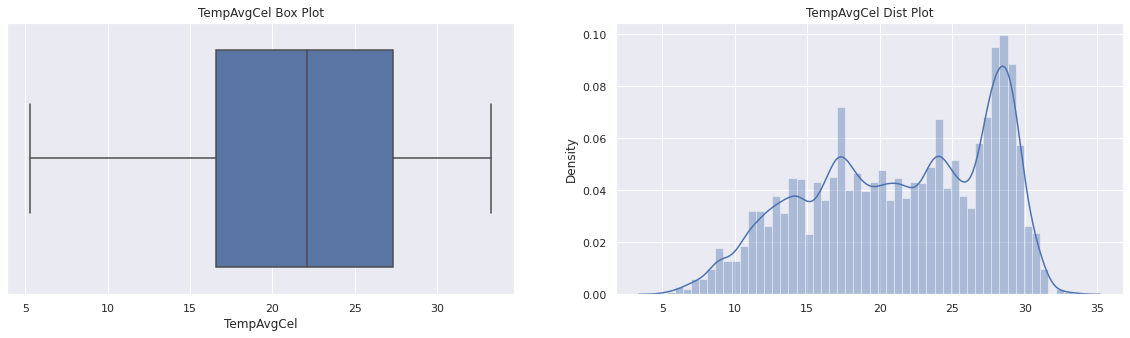

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.TempAvgCel)
axes[0].set_title('TempAvgCel Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.TempAvgCel)
axes[1].set_title('TempAvgCel Dist Plot')

plt.show()

Temperature maximum, Fahrenheit / Celsius

In [60]:
turkey_daily_climate['Temperature maximum, Fahrenheit / Celsius']

0         66.2/19.0
1         66.2/19.0
2         68.0/20.0
3         66.2/19.0
4         59.0/15.0
            ...    
91626     95.7/35.4
91627    100.6/38.1
91628     94.5/34.7
91629     95.0/35.0
91630     93.9/34.4
Name: Temperature maximum, Fahrenheit / Celsius, Length: 91631, dtype: object

In [61]:
turkey_daily_climate['TempMaxCel'] = turkey_daily_climate['Temperature maximum, Fahrenheit / Celsius'].str.split('/').str[1]
turkey_daily_climate[['Temperature maximum, Fahrenheit / Celsius', 'TempMaxCel']].head(3)

,"Temperature maximum, Fahrenheit / Celsius",TempMaxCel
0,66.2/19.0,19.0
1,66.2/19.0,19.0
2,68.0/20.0,20.0


In [62]:
turkey_daily_climate.drop(columns = ['Temperature maximum, Fahrenheit / Celsius'], inplace = True)
turkey_daily_climate['TempMaxCel'] = turkey_daily_climate['TempMaxCel'].astype(float) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


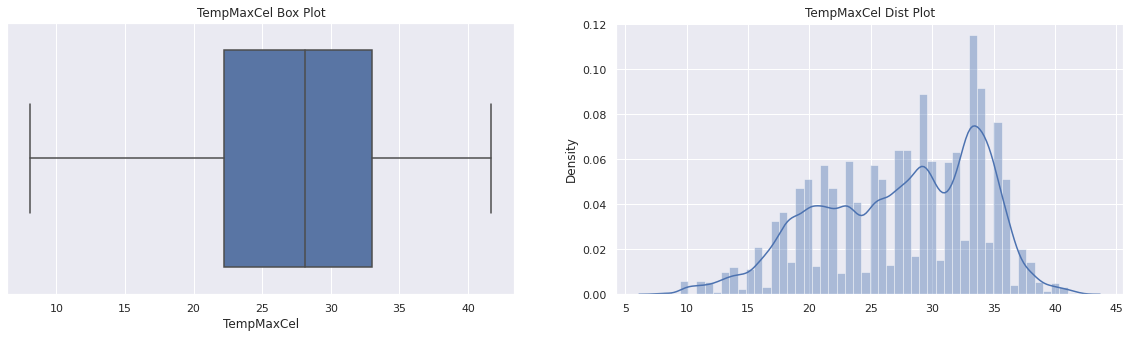

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.TempMaxCel)
axes[0].set_title('TempMaxCel Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.TempMaxCel)
axes[1].set_title('TempMaxCel Dist Plot')

plt.show()

Temperature minimum, Fahrenheit / Celsius

In [65]:
turkey_daily_climate['Temperature minimum, Fahrenheit / Celsius']

0         44.6/7.0
1        51.8/11.0
2        53.6/12.0
3         46.4/8.0
4        51.8/11.0
           ...    
91626    69.8/21.0
91627    73.2/22.9
91628    71.6/22.0
91629    67.8/19.9
91630    65.8/18.8
Name: Temperature minimum, Fahrenheit / Celsius, Length: 91631, dtype: object

In [66]:
turkey_daily_climate['TempMinCel'] = turkey_daily_climate['Temperature minimum, Fahrenheit / Celsius'].str.split('/').str[1]
turkey_daily_climate[['Temperature minimum, Fahrenheit / Celsius', 'TempMinCel']].head(3)

,"Temperature minimum, Fahrenheit / Celsius",TempMinCel
0,44.6/7.0,7.0
1,51.8/11.0,11.0
2,53.6/12.0,12.0


In [67]:
turkey_daily_climate.drop(columns = ['Temperature minimum, Fahrenheit / Celsius'], inplace = True)
turkey_daily_climate['TempMinCel'] = turkey_daily_climate['TempMinCel'].astype(float) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


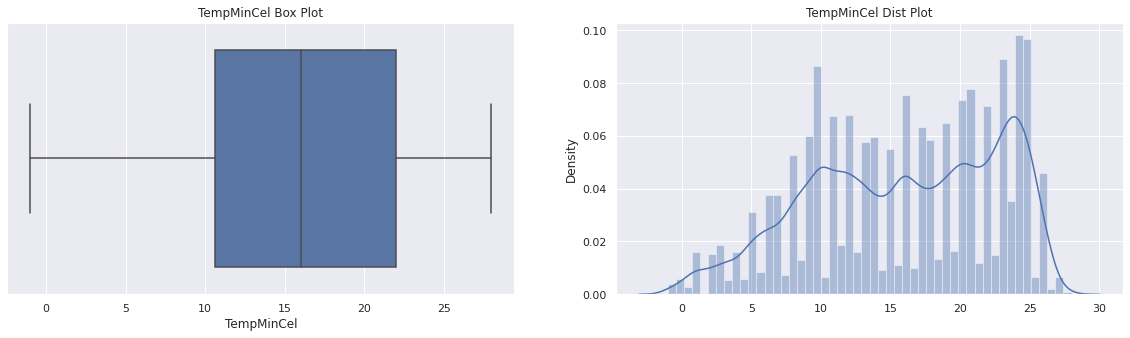

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.TempMinCel)
axes[0].set_title('TempMinCel Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.TempMinCel)
axes[1].set_title('TempMinCel Dist Plot')

plt.show()

Precipitation in / cm

In [72]:
turkey_daily_climate['Precipitation in / cm'].unique()

array([nan, '0.00/0.00', '0.01/0.03', '0.02/0.05', '0.16/0.41',
       '0.79/2.01', '0.20/0.51', '0.31/0.79', '0.08/0.20', '0.09/0.23',
       '1.61/4.09', '0.10/0.25', '0.28/0.71', '0.13/0.33', '0.21/0.53',
       '0.46/1.17', '0.17/0.43', '0.77/1.96', '0.03/0.08', '0.06/0.15',
       '0.11/0.28', '0.07/0.18', '0.04/0.10', '0.12/0.30', '0.24/0.61',
       '0.43/1.09', '0.34/0.86', '1.26/3.20', '0.66/1.68', '0.95/2.41',
       '3.15/8.00', '0.05/0.13', '0.39/0.99', '1.14/2.90', '0.69/1.75',
       '0.70/1.78', '0.54/1.37', '0.63/1.60', '0.85/2.16', '0.32/0.81',
       '0.51/1.30', '1.36/3.45', '0.27/0.69', '1.13/2.87', '0.19/0.48',
       '1.17/2.97', '0.88/2.24', '0.72/1.83', '0.76/1.93', '0.35/0.89',
       '1.85/4.70', '0.40/1.02', '0.18/0.46', ''], dtype=object)

In [75]:
turkey_daily_climate['PrecipitationCm'] = turkey_daily_climate['Precipitation in / cm'].str.split('/').str[1]
turkey_daily_climate[['Precipitation in / cm', 'PrecipitationCm']].sample(3)

,Precipitation in / cm,PrecipitationCm
16397,0.00/0.00,0.00
27776,NaN,NaN
91528,NaN,NaN


In [76]:
turkey_daily_climate.drop(columns = ['Precipitation in / cm'], inplace = True)
turkey_daily_climate['PrecipitationCm'] = turkey_daily_climate['PrecipitationCm'].astype(float)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


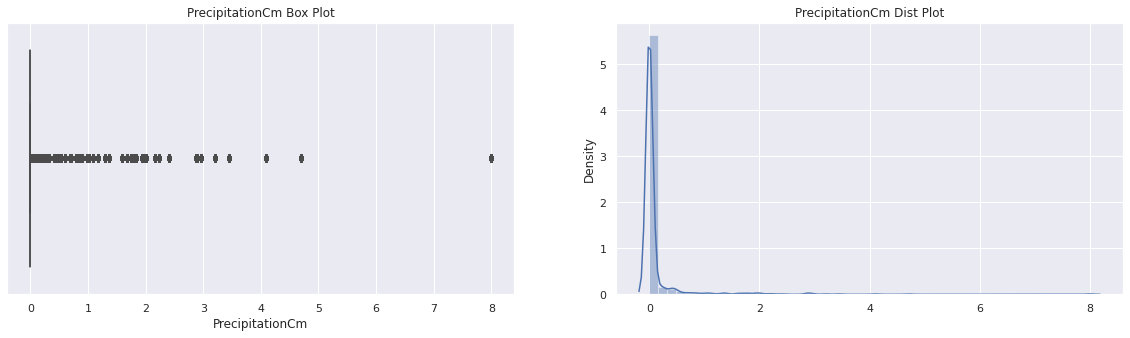

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.PrecipitationCm)
axes[0].set_title('PrecipitationCm Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.PrecipitationCm)
axes[1].set_title('PrecipitationCm Dist Plot')

plt.show()

In [81]:
turkey_daily_climate['PrecipitationCm'].unique()

array([ nan, 0.  , 0.03, 0.05, 0.41, 2.01, 0.51, 0.79, 0.2 , 0.23, 4.09,
       0.25, 0.71, 0.33, 0.53, 1.17, 0.43, 1.96, 0.08, 0.15, 0.28, 0.18,
       0.1 , 0.3 , 0.61, 1.09, 0.86, 3.2 , 1.68, 2.41, 8.  , 0.13, 0.99,
       2.9 , 1.75, 1.78, 1.37, 1.6 , 2.16, 0.81, 1.3 , 3.45, 0.69, 2.87,
       0.48, 2.97, 2.24, 1.83, 1.93, 0.89, 4.7 , 1.02, 0.46])

In [82]:
turkey_daily_climate['PrecipitationCm'].isnull().sum()

50917

Wheather Type

In [83]:
turkey_daily_climate['Weather type'].unique()

array([nan, 'Rain/Drizzle', 'Rain/Drizzle, Thunder', 'Fog',
       'Fog, Rain/Drizzle, Thunder', 'Fog, Rain/Drizzle', 'Thunder',
       'Rain/Drizzle, Hail, Thunder',
       'Rain/Drizzle, Snow, Thunder, Tornado', ''], dtype=object)

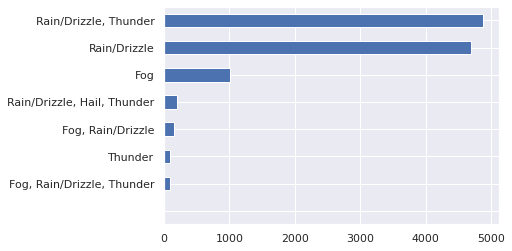

In [87]:
turkey_daily_climate[turkey_daily_climate.PrecipitationCm.isnull() == True].iloc[:,9].value_counts().sort_values().plot(kind = 'barh')

In [89]:
dict_1 = dict(turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == False) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle, Thunder')].groupby('City').PrecipitationCm.median())

for i in turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle, Thunder')].City:
    idx = turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle, Thunder')].City.index
    turkey_daily_climate.iloc[idx, 14] = dict_1[i]

In [93]:
dict_2 = dict(turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == False) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle')].groupby('City').PrecipitationCm.median())

for i in turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle')].City:
    idx = turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle')].City.index
    turkey_daily_climate.iloc[idx, 14] = dict_2[i]

In [94]:
dict_3 = dict(turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == False) & (turkey_daily_climate['Weather type'] == 'Fog')].groupby('City').PrecipitationCm.median())

for i in turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Fog')].City:
    idx = turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Fog')].City.index
    turkey_daily_climate.iloc[idx, 14] = dict_3[i]

In [96]:
dict_4 = dict(turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == False) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle, Hail, Thunder')].groupby('City').PrecipitationCm.median())

for i in turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle, Hail, Thunder')].City:
    idx = turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Rain/Drizzle, Hail, Thunder')].City.index
    turkey_daily_climate.iloc[idx, 14] = dict_4[i]

In [98]:
dict_5 = dict(turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == False) & (turkey_daily_climate['Weather type'] == 'Fog, Rain/Drizzle')].groupby('City').PrecipitationCm.median())

for i in turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Fog, Rain/Drizzle')].City:
    idx = turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Fog, Rain/Drizzle')].City.index
    turkey_daily_climate.iloc[idx, 14] = dict_5[i]

In [101]:
dict_6 = dict(turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == False) & (turkey_daily_climate['Weather type'] == 'Thunder')].groupby('City').PrecipitationCm.median())

for i in turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Thunder')].City:
    idx = turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Thunder')].City.index
    turkey_daily_climate.iloc[idx, 14] = dict_6[i]

In [103]:
dict_7 = dict(turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == False) & (turkey_daily_climate['Weather type'] == 'Fog, Rain/Drizzle, Thunder')].groupby('City').PrecipitationCm.median())

for i in turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Fog, Rain/Drizzle, Thunder')].City:
    idx = turkey_daily_climate[(turkey_daily_climate.PrecipitationCm.isnull() == True) & (turkey_daily_climate['Weather type'] == 'Fog, Rain/Drizzle, Thunder')].City.index
    turkey_daily_climate.iloc[idx, 14] = dict_7[i]

Average daily wind speed (miles/hour)

In [104]:
turkey_daily_climate['Average daily wind speed (miles/hour)']

0         3.80
1         4.60
2         7.25
3         5.52
4         5.06
         ...  
91626     6.79
91627    12.08
91628     8.17
91629     5.98
91630     4.83
Name: Average daily wind speed (miles/hour), Length: 91631, dtype: float64

In [105]:
turkey_daily_climate.rename(columns = {"Average daily wind speed (miles/hour)":"AvgDWS"}, inplace = True)
turkey_daily_climate.head(1)

,City,Year,Month,Day,AvgDWS,Visibility in miles,"Dew point, Fahrenheit / Celsius",Maximum sustained wind speed (miles/hour),Maximum wind gust reported for the day,Weather type,Date,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm
0,Adana,2010,01,01,3.8,6.0,47.8/8.8,10.24,NaN,NaN,2010-01-01,13.9,19.0,7.0,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


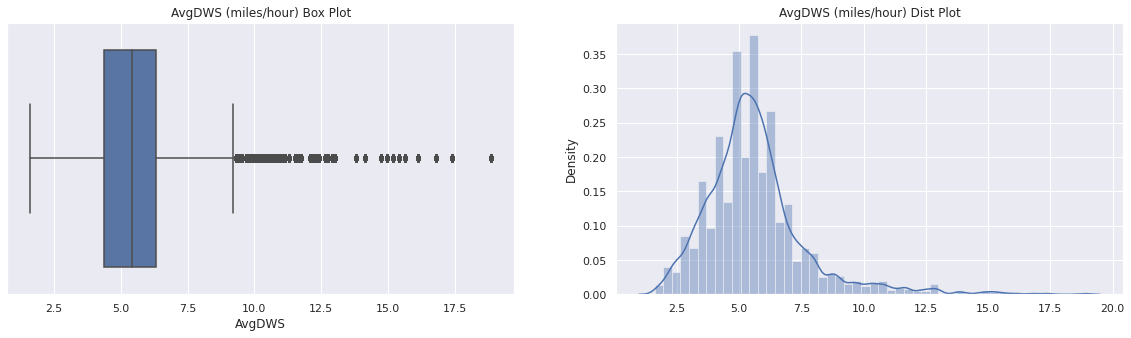

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.AvgDWS)
axes[0].set_title('AvgDWS (miles/hour) Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.AvgDWS)
axes[1].set_title('AvgDWS (miles/hour) Dist Plot')

plt.show()

In [108]:
turkey_daily_climate.AvgDWS.isnull().sum()

3745

Visibility in miles

In [109]:
turkey_daily_climate['Visibility in miles'].unique()

array([ 6.,  5.,  7.,  3.,  2.,  4.,  1., nan])

In [110]:
turkey_daily_climate.rename(columns = {"Visibility in miles":"Visibility"}, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


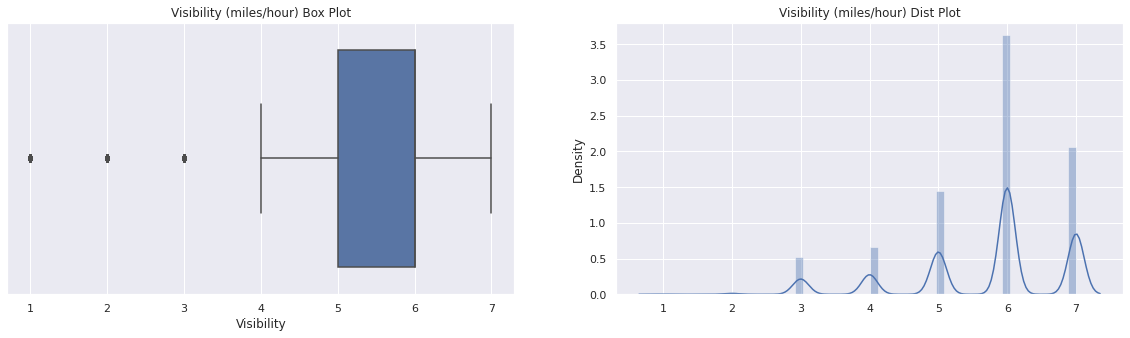

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.Visibility)
axes[0].set_title('Visibility (miles/hour) Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.Visibility)
axes[1].set_title('Visibility (miles/hour) Dist Plot')

plt.show()

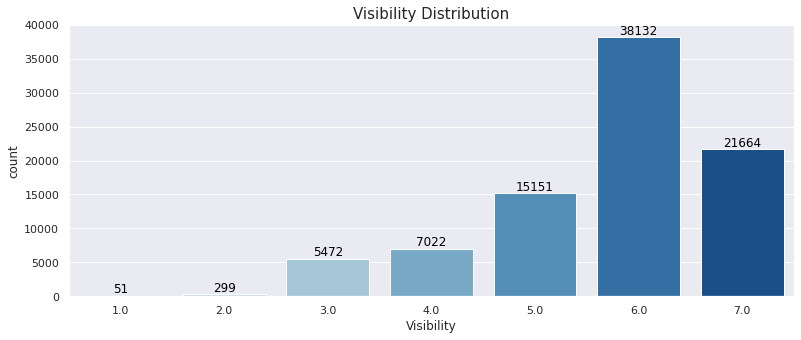

In [113]:
fig, axes = plt.subplots(figsize=(13, 5))
# Visibility Distribution
ax1 = sns.countplot(x=turkey_daily_climate.Visibility, palette="Blues")
ax1.set_title('Visibility Distribution', fontsize=15)
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+500), ha='center', va='baseline', color='black', size=12)

In [115]:
turkey_daily_climate.Visibility.isnull().sum()

3840

In [117]:
turkey_daily_climate["Visibility"].fillna(6, inplace = True)

Dew point, Fahrenheit / Celsius

In [118]:
turkey_daily_climate['Dew point, Fahrenheit / Celsius']

0         47.8/8.8
1        53.2/11.8
2         42.8/6.0
3         35.5/1.9
4         43.8/6.6
           ...    
91626    60.3/15.7
91627    50.4/10.2
91628    55.4/13.0
91629    55.4/13.0
91630    60.2/15.7
Name: Dew point, Fahrenheit / Celsius, Length: 91631, dtype: object

In [121]:
turkey_daily_climate['DewPntCel'] = turkey_daily_climate['Dew point, Fahrenheit / Celsius'].str.split('/').str[1]
turkey_daily_climate[['Dew point, Fahrenheit / Celsius', 'DewPntCel']].sample(3)

,"Dew point, Fahrenheit / Celsius",DewPntCel
9432,41.5/5.3,5.3
27626,64.2/17.9,17.9
68537,49.1/9.5,9.5


In [122]:
turkey_daily_climate.drop(columns = ['Dew point, Fahrenheit / Celsius'], inplace = True)
turkey_daily_climate['DewPntCel'] = turkey_daily_climate['DewPntCel'].astype(float)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


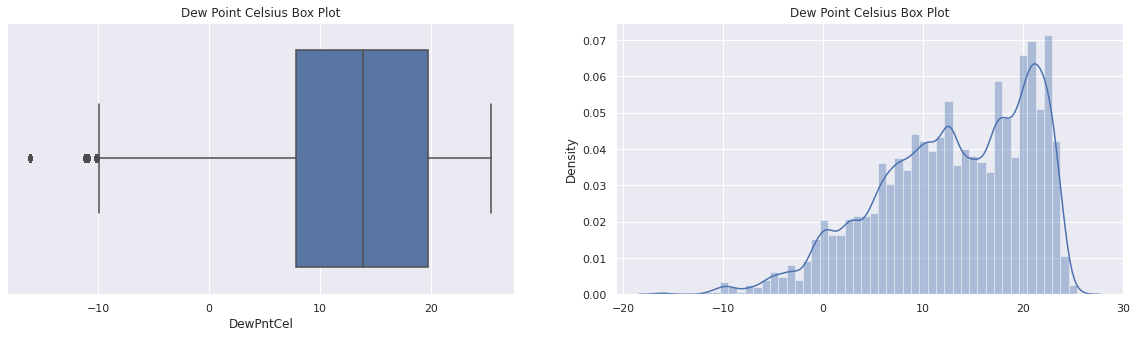

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.DewPntCel)
axes[0].set_title('Dew Point Celsius Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.DewPntCel)
axes[1].set_title('Dew Point Celsius Box Plot')

plt.show()

Maximum sustained wind speed (miles/hour)

In [125]:
turkey_daily_climate['Maximum sustained wind speed (miles/hour)']

0        10.24
1        16.11
2        16.11
3        10.24
4        11.39
         ...  
91626    17.26
91627    20.83
91628    14.96
91629    14.96
91630    12.77
Name: Maximum sustained wind speed (miles/hour), Length: 91631, dtype: float64

In [126]:
turkey_daily_climate.rename(columns = {"Maximum sustained wind speed (miles/hour)":"MaxSusWS"}, inplace = True)
turkey_daily_climate.head(1)

,City,Year,Month,Day,AvgDWS,Visibility,MaxSusWS,Maximum wind gust reported for the day,Weather type,Date,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel
0,Adana,2010,01,01,3.8,6.0,10.24,NaN,NaN,2010-01-01,13.9,19.0,7.0,NaN,8.8


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


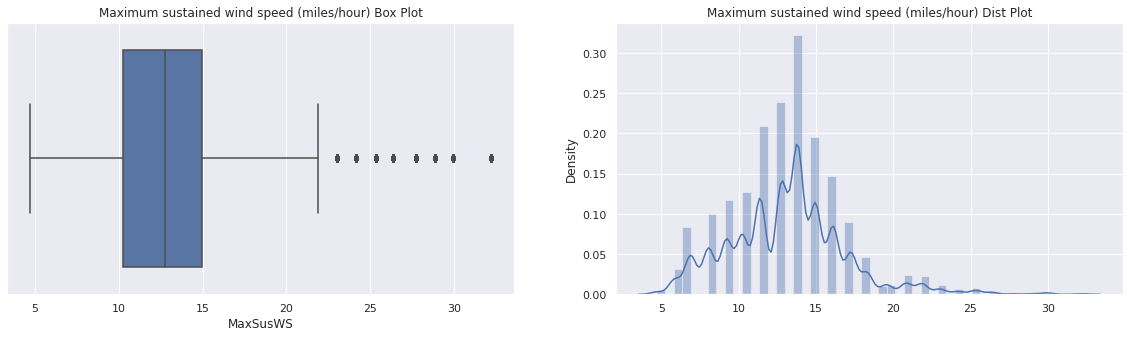

In [128]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.MaxSusWS)
axes[0].set_title('Maximum sustained wind speed (miles/hour) Box Plot')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.MaxSusWS)
axes[1].set_title('Maximum sustained wind speed (miles/hour) Dist Plot')

plt.show()

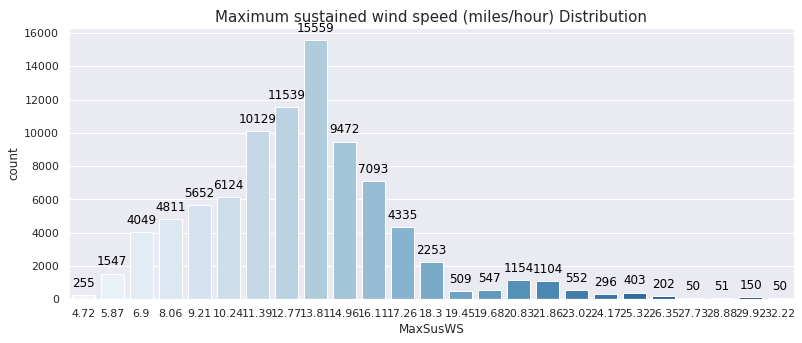

In [129]:
fig, axes = plt.subplots(figsize=(13, 5))
# Visibility Distribution
ax1 = sns.countplot(x=turkey_daily_climate.MaxSusWS, palette="Blues")
ax1.set_title('Maximum sustained wind speed (miles/hour) Distribution', fontsize=15)
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+500), ha='center', va='baseline', color='black', size=12)

In [131]:
turkey_daily_climate.MaxSusWS.isnull().sum()

3745

In [132]:
turkey_daily_climate.groupby(['City']).median()

,Year,AvgDWS,Visibility,MaxSusWS,Maximum wind gust reported for the day,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel
City,,,,,,,,,,
Adana,2012.5,5.41,6.0,13.81,29.92,22.30,28.60,17.00,0.0,14.40
Adiyaman,2012.5,5.29,6.0,12.77,29.92,21.00,28.00,15.70,0.0,12.90
Afyonkarahisar,2012.5,5.41,6.0,13.81,28.88,23.20,29.00,17.80,0.0,15.10
Agri,2012.5,5.41,6.0,13.81,29.92,21.30,28.00,16.00,0.0,13.00
Amasya,2012.5,5.41,6.0,12.77,29.92,22.10,28.30,16.00,0.0,13.70
Ankara,2012.5,5.52,6.0,13.81,28.88,23.10,29.00,17.00,0.0,14.75
Antalya,2012.5,5.29,6.0,12.77,29.92,20.80,27.40,15.00,0.0,12.60
Artvin,2012.5,5.41,6.0,12.77,29.40,23.10,29.00,17.00,0.0,14.85
Aydin,2012.5,5.41,6.0,13.81,29.92,21.70,28.00,16.00,0.0,13.50


In [133]:
turkey_daily_climate.groupby(['City']).MaxSusWS.median().value_counts()

12.77    23
13.81    19
Name: MaxSusWS, dtype: int64

In [135]:
dict_MaxSusWS = dict(turkey_daily_climate[(turkey_daily_climate.MaxSusWS.isnull() == False)].groupby('City').MaxSusWS.median())

In [136]:
for i in turkey_daily_climate[(turkey_daily_climate.MaxSusWS.isnull() == True)].City:
    idx = turkey_daily_climate[(turkey_daily_climate.MaxSusWS.isnull() == True)].City.index
    turkey_daily_climate.iloc[idx, 6] = dict_MaxSusWS[i]

In [137]:
turkey_daily_climate.MaxSusWS.isnull().sum()

0

Maximum wind gust reported for the day

In [138]:
turkey_daily_climate['Maximum wind gust reported for the day'].unique()


array([  nan, 33.26, 28.88, 37.98, 31.07, 21.86, 20.83, 25.32, 29.92,
       39.13, 34.41, 41.31, 42.46, 32.22, 23.02, 24.17, 18.3 , 52.94,
       36.94, 43.84, 19.68, 27.73, 35.79, 16.11, 40.28, 26.35, 17.26])

In [139]:
turkey_daily_climate.rename(columns = {"Maximum wind gust reported for the day":"MaxWG"}, inplace = True)
turkey_daily_climate.head(1)

,City,Year,Month,Day,AvgDWS,Visibility,MaxSusWS,MaxWG,Weather type,Date,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel
0,Adana,2010,01,01,3.8,6.0,10.24,NaN,NaN,2010-01-01,13.9,19.0,7.0,NaN,8.8


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


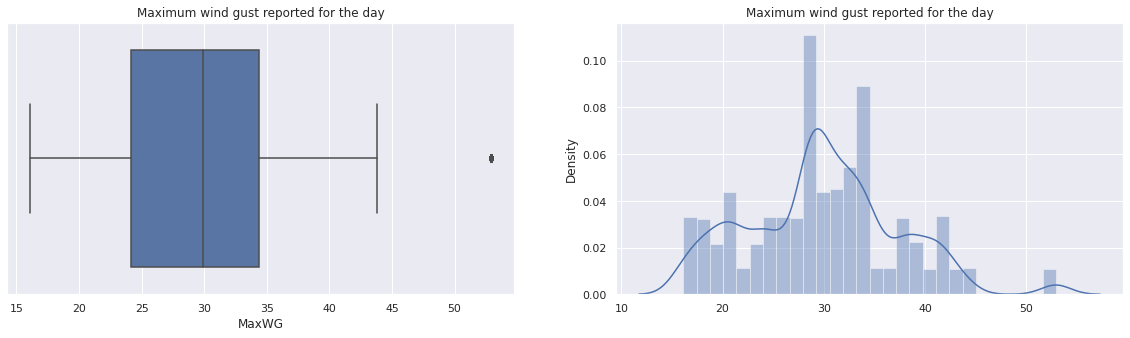

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)
# fig.suptitle('Box & Distribution Plots')

# Box Plot
sns.boxplot(ax=axes[0], x = turkey_daily_climate.MaxWG)
axes[0].set_title('Maximum wind gust reported for the day')

# Distribution Plot
sns.distplot(ax=axes[1], x = turkey_daily_climate.MaxWG)
axes[1].set_title('Maximum wind gust reported for the day')

plt.show()

In [142]:
turkey_daily_climate.groupby(['City']).median()

,Year,AvgDWS,Visibility,MaxSusWS,MaxWG,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel
City,,,,,,,,,,
Adana,2012.5,5.41,6.0,13.81,29.92,22.30,28.60,17.00,0.0,14.40
Adiyaman,2012.5,5.29,6.0,12.77,29.92,21.00,28.00,15.70,0.0,12.90
Afyonkarahisar,2012.5,5.41,6.0,13.81,28.88,23.20,29.00,17.80,0.0,15.10
Agri,2012.5,5.41,6.0,13.81,29.92,21.30,28.00,16.00,0.0,13.00
Amasya,2012.5,5.41,6.0,13.81,29.92,22.10,28.30,16.00,0.0,13.70
Ankara,2012.5,5.52,6.0,13.81,28.88,23.10,29.00,17.00,0.0,14.75
Antalya,2012.5,5.29,6.0,13.81,29.92,20.80,27.40,15.00,0.0,12.60
Artvin,2012.5,5.41,6.0,13.81,29.40,23.10,29.00,17.00,0.0,14.85
Aydin,2012.5,5.41,6.0,13.81,29.92,21.70,28.00,16.00,0.0,13.50


In [143]:
turkey_daily_climate.groupby(['City']).MaxWG.median().value_counts()

29.92    25
28.88    11
29.40     6
Name: MaxWG, dtype: int64

In [144]:
dict_MaxWG = dict(turkey_daily_climate[(turkey_daily_climate.MaxWG.isnull() == False)].groupby('City').MaxWG.median())

In [145]:
for i in turkey_daily_climate[(turkey_daily_climate.MaxWG.isnull() == True)].City:
    idx = turkey_daily_climate[(turkey_daily_climate.MaxWG.isnull() == True)].City.index
    turkey_daily_climate.iloc[idx, 7] = dict_MaxWG[i]

turkey_daily_climate.MaxWG.isnull().sum()

0

Wheather Type

In [146]:
turkey_daily_climate['Weather type'].unique()

array([nan, 'Rain/Drizzle', 'Rain/Drizzle, Thunder', 'Fog',
       'Fog, Rain/Drizzle, Thunder', 'Fog, Rain/Drizzle', 'Thunder',
       'Rain/Drizzle, Hail, Thunder',
       'Rain/Drizzle, Snow, Thunder, Tornado', ''], dtype=object)

In [147]:
turkey_daily_climate.rename(columns = {"Weather type":"WeatherType"}, inplace = True)

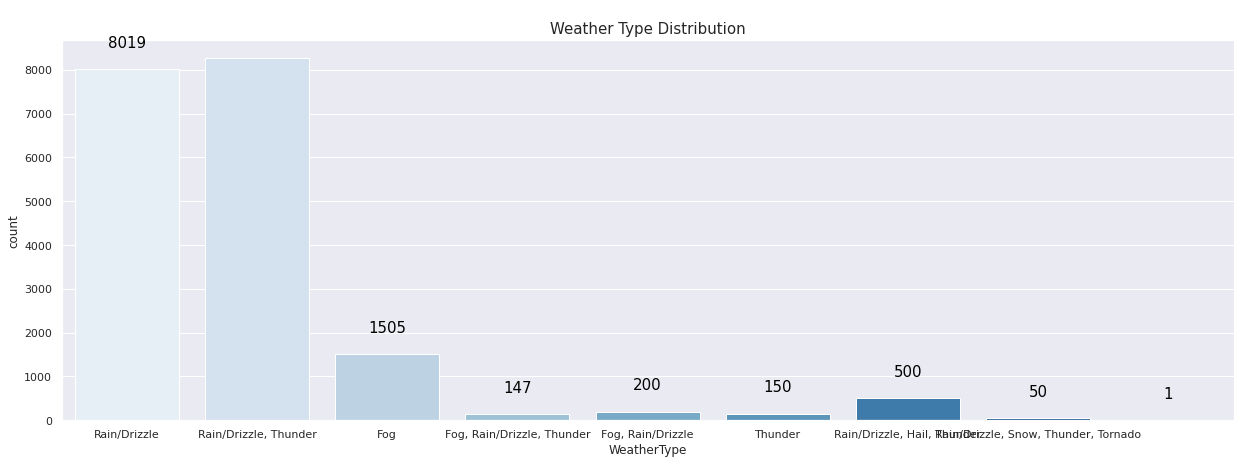

In [148]:
fig, axes = plt.subplots(figsize=(21, 7))
# Visibility Distribution
ax1 = sns.countplot(x=turkey_daily_climate.WeatherType, palette="Blues")
ax1.set_title('Weather Type Distribution', fontsize=15)
for p in ax1.patches:
    ax1.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+500), ha='center', va='baseline', color='black', size=15)

In [152]:
abc = pd.DataFrame(turkey_daily_climate.groupby(['City']).WeatherType.value_counts())

for i in turkey_daily_climate[turkey_daily_climate.WeatherType.isnull() == True].City:
    idx = turkey_daily_climate[turkey_daily_climate.WeatherType.isnull() == True].City.index
    turkey_daily_climate.iloc[idx,8] = abc.loc[i][:1].index.tolist()[0]

turkey_daily_climate.WeatherType.isnull().sum()

0

## Fire Dataset integration

In [153]:
df_2010_2015 = pd.read_csv("df_2010_2015.csv")

In [154]:
df_2010_2015.head(1)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,province,elevation
0,39.1908,31.1941,307.8,1.6,1.2,2010-01-01,915,Terra,MODIS,66,6.2,286.1,17.7,D,0,Afyonkarahisar,943


In [155]:
turkey_daily_climate.City.unique()

array(['Adana', 'Adiyaman', 'Afyonkarahisar', 'Agri', 'Amasya', 'Ankara',
       'Antalya', 'Artvin', 'Aydin', 'Balikesir', 'Bilecik', 'Bingol',
       'Bolu', 'Burdur', 'Bursa', 'Canakkale', 'Cankiri', 'Corum',
       'Denizli', 'Diyarbakir', 'Edirne', 'Elazig', 'Erzincan', 'Erzurum',
       'Eskisehir', 'Gap', 'Sanliurfa', 'Giresun', 'Gumushane', 'Hakkari',
       'Hatay', 'Isparta', 'Istanbul', 'Mersin', 'Izmir', 'Kars',
       'Kastamonu', 'Kayseri', 'Kirklareli', 'Kirsehir', 'Kocaeli',
       'Konya'], dtype=object)

In [156]:
len(turkey_daily_climate.City.unique())

42

In [157]:
city_map = {"City" : {'Adiyaman':'Adıyaman', 'Agri':'Ağrı', 'Aydin':'Aydın', 'Balikesir':'Balıkesir', 'Bingol':'Bingöl', 'Canakkale':'Çanakkale', 'Cankiri':'Çankırı', 'Corum':'Çorum', 'Diyarbakir':'Diyarbakır', 'Elazig':'Elâzığ', 'Eskisehir':'Eskişehir', 'Sanliurfa':'Şanlıurfa', 'Gumushane':'Gümüşhane', 'Hakkari':'Hakkâri', 'Istanbul':'İstanbul', 'Izmir':'İzmir', 'Kirklareli':'Kırklareli', 'Kirsehir':'Kırşehir', 'Kutahya':'Kütahya', 'Kahramanmaras':'Kahramanmaraş', 'Mugla':'Muğla', 'Mus':'Muş', 'Nevsehir':'Nevşehir', 'Nigde':'Niğde', 'Tekirdag':'Tekirdağ', 'Usak':'Uşak', 'Kirikkale':'Kırıkkale'}}

In [158]:
turkey_daily_climate = turkey_daily_climate.replace(city_map)

In [159]:
list_ = []
for i,j in zip(df_2010_2015.acq_date, df_2010_2015.province):
    list_.append((i,j))

In [160]:
unique = list(set(list_))

In [161]:
turkey_daily_climate['Fire'] = 0

In [163]:
for i,j in zip(turkey_daily_climate.Date, turkey_daily_climate.City):
    for k in unique:
        if  (i == k[0]) and (j == k[1]):
            idx = turkey_daily_climate[(turkey_daily_climate.Date == i)&(turkey_daily_climate.City == j)].index
            turkey_daily_climate.iloc[idx, 15] = 1

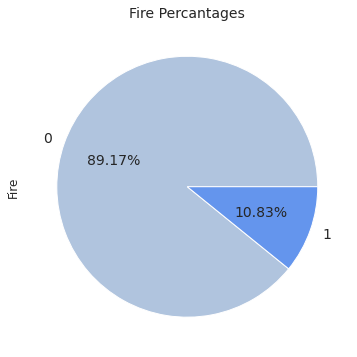

In [164]:
colors = ['lightsteelblue','cornflowerblue']
ax = turkey_daily_climate.Fire.value_counts().plot.pie(autopct='%1.2f%%', figsize=(6, 6),fontsize=14, colors=colors)
ax.set_title('Fire Percantages', fontsize = 14)
plt.show()

In [165]:
df = turkey_daily_climate.sort_values(by = 'Date')

In [166]:
turkey_daily_climate.set_index(['Date'], inplace = True)

In [167]:
turkey_daily_climate

,City,Year,Month,Day,AvgDWS,Visibility,MaxSusWS,MaxWG,WeatherType,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel,Fire
Date,,,,,,,,,,,,,,,
2010-01-01,Adana,2010,01,01,3.80,6.0,10.24,29.92,"Rain/Drizzle, Thunder",13.9,19.0,7.0,NaN,8.8,0
2010-01-02,Adana,2010,01,02,4.60,6.0,16.11,29.92,Rain/Drizzle,15.1,19.0,11.0,0.03,11.8,0
2010-01-03,Adana,2010,01,03,7.25,5.0,16.11,29.92,Rain/Drizzle,15.9,20.0,12.0,0.03,6.0,0
2010-01-04,Adana,2010,01,04,5.52,6.0,10.24,29.92,"Rain/Drizzle, Thunder",14.1,19.0,8.0,NaN,1.9,0
2010-01-05,Adana,2010,01,05,5.06,6.0,11.39,29.92,Rain/Drizzle,12.8,15.0,11.0,0.03,6.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-27,Konya,2012,02,27,6.79,6.0,17.26,29.92,"Rain/Drizzle, Thunder",28.2,35.4,21.0,0.00,15.7,0
2012-02-28,Konya,2012,02,28,12.08,6.0,20.83,31.07,"Rain/Drizzle, Thunder",31.1,38.1,22.9,0.00,10.2,0
2012-02-29,Konya,2012,02,29,8.17,6.0,14.96,29.92,"Rain/Drizzle, Thunder",29.1,34.7,22.0,0.00,13.0,0


In [168]:
X = turkey_daily_climate.drop(columns = 'Fire')
y = turkey_daily_climate.Fire

In [169]:
turkey_daily_climate.to_csv('fire_data_turkey_v1.csv')

## EDA

In [201]:
quarter_dict = {'01': 'Q1', '02': 'Q1', '03': 'Q1', '04': 'Q2', '05': 'Q2', '06': 'Q2', '07': 'Q3', '08': 'Q3', '09': 'Q3', '10': 'Q4', '11': 'Q4', '12': 'Q4' }

q = []
for i in turkey_daily_climate['Month'].to_list():
  q.append(quarter_dict.get(str(i)))

turkey_daily_climate['Quarter'] = q

In [206]:
turkey_daily_climate

,City,Year,Month,Day,AvgDWS,Visibility,MaxSusWS,MaxWG,WeatherType,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel,Fire,Quarter
Date,,,,,,,,,,,,,,,,
2010-01-01,Adana,2010,01,01,3.80,6.0,10.24,29.92,"Rain/Drizzle, Thunder",13.9,19.0,7.0,NaN,8.8,0,Q1
2010-01-02,Adana,2010,01,02,4.60,6.0,16.11,29.92,Rain/Drizzle,15.1,19.0,11.0,0.03,11.8,0,Q1
2010-01-03,Adana,2010,01,03,7.25,5.0,16.11,29.92,Rain/Drizzle,15.9,20.0,12.0,0.03,6.0,0,Q1
2010-01-04,Adana,2010,01,04,5.52,6.0,10.24,29.92,"Rain/Drizzle, Thunder",14.1,19.0,8.0,NaN,1.9,0,Q1
2010-01-05,Adana,2010,01,05,5.06,6.0,11.39,29.92,Rain/Drizzle,12.8,15.0,11.0,0.03,6.6,0,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-02-27,Konya,2012,02,27,6.79,6.0,17.26,29.92,"Rain/Drizzle, Thunder",28.2,35.4,21.0,0.00,15.7,0,Q1
2012-02-28,Konya,2012,02,28,12.08,6.0,20.83,31.07,"Rain/Drizzle, Thunder",31.1,38.1,22.9,0.00,10.2,0,Q1
2012-02-29,Konya,2012,02,29,8.17,6.0,14.96,29.92,"Rain/Drizzle, Thunder",29.1,34.7,22.0,0.00,13.0,0,Q1


In [207]:
turkey_daily_climate.corr()

,Year,AvgDWS,Visibility,MaxSusWS,MaxWG,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel,Fire
Year,1.000000,-0.000391,-0.012414,0.000945,-0.001449,0.001040,0.001161,0.000909,-0.000311,0.000408,-0.027978
AvgDWS,-0.000391,1.000000,0.163694,0.804121,0.217744,-0.003877,-0.147685,0.090858,0.089744,-0.071265,-0.002803
Visibility,-0.012414,0.163694,1.000000,0.213583,-0.011700,0.393539,0.355073,0.379036,-0.057581,0.289546,-0.003278
MaxSusWS,0.000945,0.804121,0.213583,1.000000,0.234774,0.170577,0.059371,0.241426,0.140796,0.138279,-0.000842
MaxWG,-0.001449,0.217744,-0.011700,0.234774,1.000000,-0.077285,-0.085536,-0.061049,0.107115,-0.075200,0.001759
TempAvgCel,0.001040,-0.003877,0.393539,0.170577,-0.077285,1.000000,0.961577,0.961188,-0.103881,0.860183,-0.002257
TempMaxCel,0.001161,-0.147685,0.355073,0.059371,-0.085536,0.961577,1.000000,0.863795,-0.134660,0.755568,-0.001141
TempMinCel,0.000909,0.090858,0.379036,0.241426,-0.061049,0.961188,0.863795,1.000000,-0.052012,0.920685,-0.003412
PrecipitationCm,-0.000311,0.089744,-0.057581,0.140796,0.107115,-0.103881,-0.134660,-0.052012,1.000000,0.012857,0.005368
DewPntCel,0.000408,-0.071265,0.289546,0.138279,-0.075200,0.860183,0.755568,0.920685,0.012857,1.000000,-0.004579


In [171]:
turkey_daily_climate.corr()["Fire"].sort_values()

Year              -0.027978
DewPntCel         -0.004579
TempMinCel        -0.003412
Visibility        -0.003278
AvgDWS            -0.002803
TempAvgCel        -0.002257
TempMaxCel        -0.001141
MaxSusWS          -0.000842
MaxWG              0.001759
PrecipitationCm    0.005368
Fire               1.000000
Name: Fire, dtype: float64

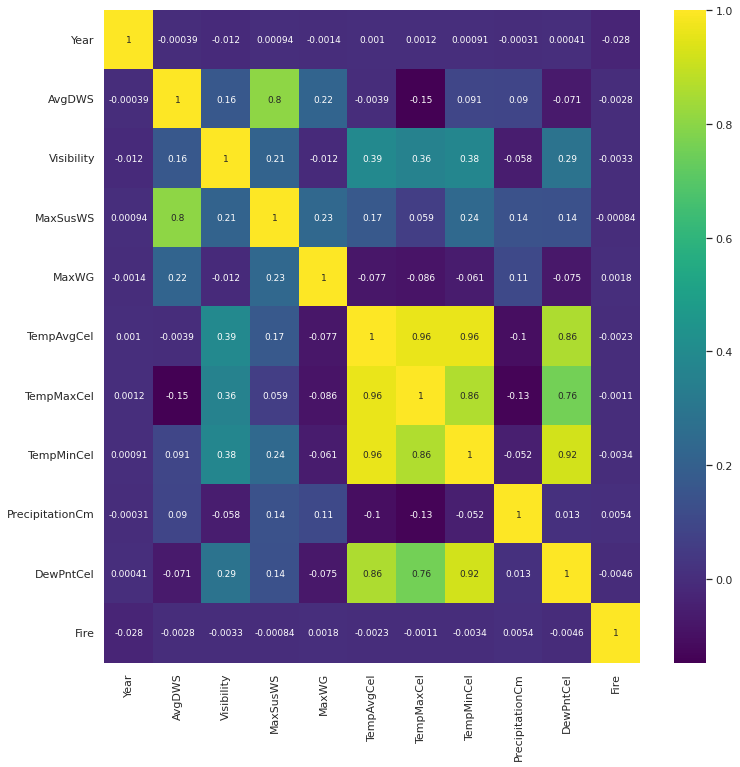

In [210]:
plt.figure(figsize=(12,12))
sns.heatmap(turkey_daily_climate.corr(),annot=True,cmap="viridis", annot_kws={"size": 9})
plt.show()

,City,Year,Month,Day,AvgDWS,Visibility,MaxSusWS,MaxWG,WeatherType,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel,Quarter,Fire
Date,,,,,,,,,,,,,,,,
2010-01-01,Adana,2010,01,01,3.8,6.0,10.24,29.92,"Rain/Drizzle, Thunder",13.9,19.0,7.0,NaN,8.8,Q1,0


## Model selection & Training

In [343]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPRegressor, MLPClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings(action='ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
le = LabelEncoder()
label = le.fit_transform(turkey_daily_climate['WeatherType'])
turkey_daily_climate.drop("WeatherType", axis=1, inplace=True)
turkey_daily_climate["WeatherType"] = label

label = le.fit_transform(turkey_daily_climate['City'])
turkey_daily_climate.drop("City", axis=1, inplace=True)
turkey_daily_climate["City"] = label

label = le.fit_transform(turkey_daily_climate['Quarter'])
turkey_daily_climate.drop("Quarter", axis=1, inplace=True)
turkey_daily_climate["Quarter"] = label

In [246]:
turkey_daily_climate.head()

,Year,Month,Day,AvgDWS,Visibility,MaxSusWS,MaxWG,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel,Fire,WeatherType,City,Quarter
Date,,,,,,,,,,,,,,,,
2010-01-01,2010,01,01,3.80,6.0,10.24,29.92,13.9,19.0,7.0,NaN,8.8,0,7,0,0
2010-01-02,2010,01,02,4.60,6.0,16.11,29.92,15.1,19.0,11.0,0.03,11.8,0,4,0,0
2010-01-03,2010,01,03,7.25,5.0,16.11,29.92,15.9,20.0,12.0,0.03,6.0,0,4,0,0
2010-01-04,2010,01,04,5.52,6.0,10.24,29.92,14.1,19.0,8.0,NaN,1.9,0,7,0,0
2010-01-05,2010,01,05,5.06,6.0,11.39,29.92,12.8,15.0,11.0,0.03,6.6,0,4,0,0


In [249]:
cols = ['City',
 'Year',
 'Month',
 'Day',
 'AvgDWS',
 'Visibility',
 'MaxSusWS',
 'MaxWG',
 'WeatherType',
 'TempAvgCel',
 'TempMaxCel',
 'TempMinCel',
 'PrecipitationCm',
 'DewPntCel',
 'Quarter',
 'Fire'
 ]
turkey_daily_climate = turkey_daily_climate[cols]
turkey_daily_climate.head(1)

,City,Year,Month,Day,AvgDWS,Visibility,MaxSusWS,MaxWG,WeatherType,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel,Quarter,Fire
Date,,,,,,,,,,,,,,,,
2010-01-01,0,2010,01,01,3.8,6.0,10.24,29.92,7,13.9,19.0,7.0,NaN,8.8,0,0


In [255]:
normalized_data_df = turkey_daily_climate[turkey_daily_climate['PrecipitationCm'].notna()]
normalized_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51849 entries, 2010-01-02 to 2012-02-31
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             51849 non-null  int64  
 1   Year             51849 non-null  int64  
 2   Month            51849 non-null  object 
 3   Day              51849 non-null  object 
 4   AvgDWS           51145 non-null  float64
 5   Visibility       51849 non-null  float64
 6   MaxSusWS         51849 non-null  float64
 7   MaxWG            51849 non-null  float64
 8   WeatherType      51849 non-null  int64  
 9   TempAvgCel       51849 non-null  float64
 10  TempMaxCel       51849 non-null  float64
 11  TempMinCel       51849 non-null  float64
 12  PrecipitationCm  51849 non-null  float64
 13  DewPntCel        51849 non-null  float64
 14  Quarter          51849 non-null  int64  
 15  Fire             51849 non-null  int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 

In [257]:
normalized_data_df.isnull().sum()

City                 0
Year                 0
Month                0
Day                  0
AvgDWS             704
Visibility           0
MaxSusWS             0
MaxWG                0
WeatherType          0
TempAvgCel           0
TempMaxCel           0
TempMinCel           0
PrecipitationCm      0
DewPntCel            0
Quarter              0
Fire                 0
dtype: int64

In [286]:
normalized_data_df = normalized_data_df.reset_index()
normalized_data_df

,Date,City,AvgDWS,Visibility,MaxSusWS,MaxWG,WeatherType,TempAvgCel,TempMaxCel,TempMinCel,PrecipitationCm,DewPntCel,Quarter,Fire
0,2010-01-01,5,5.41,6.0,12.77,29.92,7,23.4,30.0,18.7,0.000,17.1,0,0
1,2010-01-01,6,5.18,6.0,12.77,29.92,7,22.6,28.6,17.8,3.200,17.0,0,0
2,2010-01-01,7,1.84,3.0,8.06,29.92,1,10.5,18.3,3.0,0.000,3.9,0,0
3,2010-01-01,9,4.26,5.0,12.77,29.92,7,31.2,38.5,24.0,0.000,20.4,0,1
4,2010-01-01,11,6.21,7.0,13.81,29.92,4,18.0,22.0,13.0,0.030,12.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135138,2015-12-31,28,5.52,4.0,12.77,29.92,7,13.6,16.4,10.7,1.170,10.8,3,0
135139,2015-12-31,29,6.67,6.0,18.30,29.92,7,27.7,33.4,23.0,0.000,19.6,3,0
135140,2015-12-31,30,5.18,6.0,16.11,18.30,7,21.9,27.6,16.0,0.000,12.9,3,0
135141,2015-12-31,33,2.30,6.0,6.90,29.92,7,17.1,27.4,7.8,0.000,4.6,3,0


In [307]:
# del normalized_data_df['Date'], normalized_data_df['AvgDWS']

In [299]:
normalized_data_df.value_counts(["Fire"])

Fire
0       114562
1        20581
dtype: int64

In [327]:
s0 = normalized_data_df.Fire[normalized_data_df.Fire.eq(0)].sample(3652).index
s1 = normalized_data_df.Fire[normalized_data_df.Fire.eq(1)].sample(3652).index

master_dataset = normalized_data_df.loc[s0.union(s1)]

x = master_dataset.iloc[ : , :-1]
y = master_dataset.iloc[ : ,-1]

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=1)

In [328]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [355]:
models = ['LR', 'KNN', 'XGB', 'SVM', 'MLP']

In [348]:
acc = []

### **Logistic Regression**

Training accuracy: 0.583
Test accuracy: 0.611
              precision    recall  f1-score   support

           0       0.61      0.55      0.58      1071
           1       0.61      0.67      0.64      1121

    accuracy                           0.61      2192
   macro avg       0.61      0.61      0.61      2192
weighted avg       0.61      0.61      0.61      2192



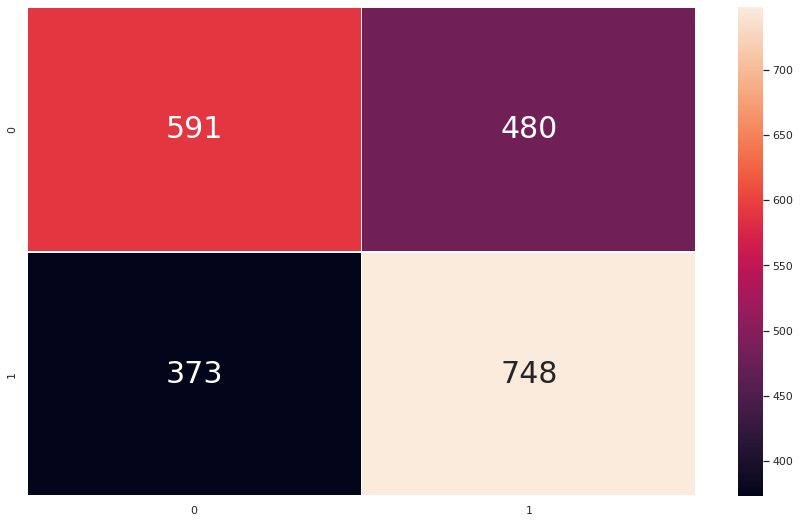

In [349]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

print('Training accuracy:', lr.score(X_train, y_train).round(3))
acc.append(lr.score(X_train, y_train).round(3))
print('Test accuracy:', lr.score(X_test, y_test).round(3))
y_hat_rf = lr.predict(X_test)
print(classification_report(y_test, y_hat_rf))

cm = confusion_matrix(y_test, y_hat_rf)
plt.figure(figsize = (15,9))
sns.heatmap(cm, linewidths=1, annot=True, fmt='g')

### **KNN**

Training accuracy: 0.78
Test accuracy: 0.656
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1071
           1       0.66      0.68      0.67      1121

    accuracy                           0.66      2192
   macro avg       0.66      0.66      0.66      2192
weighted avg       0.66      0.66      0.66      2192



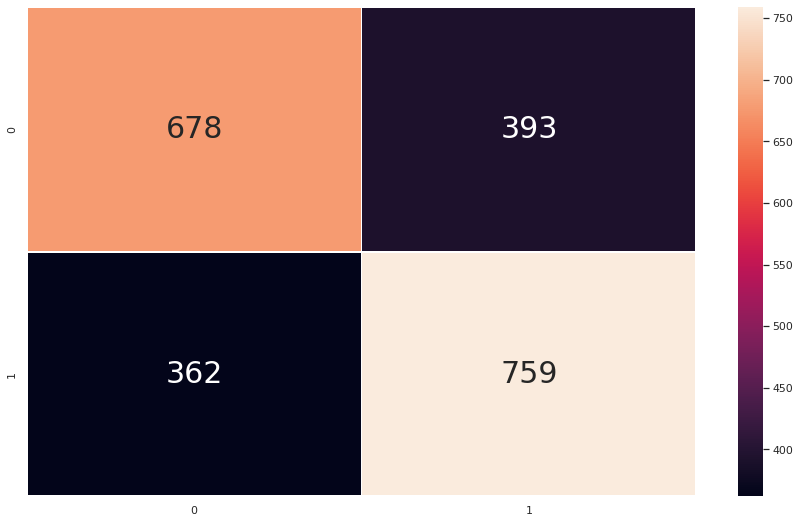

In [350]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Training accuracy:', knn.score(X_train, y_train).round(3))
acc.append(knn.score(X_train, y_train).round(3))
print('Test accuracy:', knn.score(X_test, y_test).round(3))
y_hat_rf = knn.predict(X_test)
print(classification_report(y_test, y_hat_rf))

cm = confusion_matrix(y_test, y_hat_rf)
plt.figure(figsize = (15,9))
sns.heatmap(cm, linewidths=1, annot=True, fmt='g')

### **XGBClassifier**

Training accuracy: 0.76
Test accuracy: 0.755
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1071
           1       0.78      0.73      0.75      1121

    accuracy                           0.76      2192
   macro avg       0.76      0.76      0.76      2192
weighted avg       0.76      0.76      0.76      2192



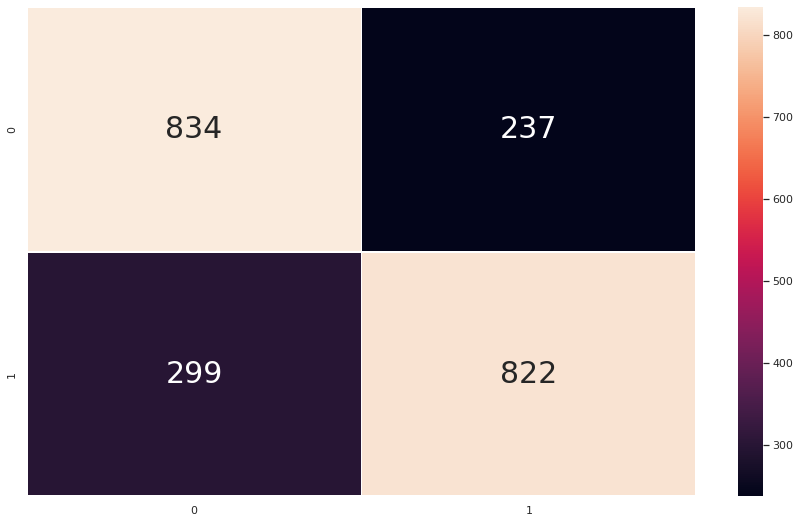

In [351]:
xgb = XGBClassifier().fit(X_train, y_train)

print('Training accuracy:', xgb.score(X_train, y_train).round(3))
acc.append(xgb.score(X_train, y_train).round(3))

print('Test accuracy:', xgb.score(X_test, y_test).round(3))
y_hat_rf = xgb.predict(X_test)
print(classification_report(y_test, y_hat_rf))

cm = confusion_matrix(y_test, y_hat_rf)
plt.figure(figsize = (15,9))
sns.heatmap(cm, linewidths=1, annot=True, fmt='g')

### **Support Vector Machines**

Training accuracy: 0.686
Test accuracy: 0.663
              precision    recall  f1-score   support

           0       0.64      0.71      0.67      1071
           1       0.69      0.61      0.65      1121

    accuracy                           0.66      2192
   macro avg       0.67      0.66      0.66      2192
weighted avg       0.67      0.66      0.66      2192



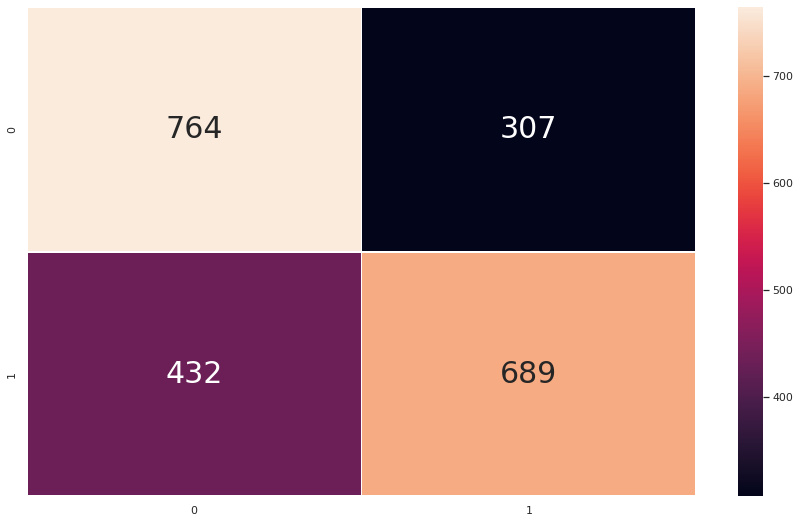

In [352]:
svc = SVC()
svc.fit(X_train, y_train)
print('Training accuracy:', svc.score(X_train, y_train).round(3))
acc.append(svc.score(X_train, y_train).round(3))

y_hat_rf = svc.predict(X_test)
print('Test accuracy:', svc.score(X_test, y_test).round(3))
y_hat_rf = svc.predict(X_test)
print(classification_report(y_test, y_hat_rf))

cm = confusion_matrix(y_test, y_hat_rf)
plt.figure(figsize = (15,9))
sns.heatmap(cm, linewidths=1, annot=True, fmt='g')

### **MLP**

Training accuracy: 0.696
Test accuracy: 0.675
              precision    recall  f1-score   support

           0       0.65      0.72      0.68      1071
           1       0.70      0.63      0.67      1121

    accuracy                           0.67      2192
   macro avg       0.68      0.68      0.67      2192
weighted avg       0.68      0.67      0.67      2192



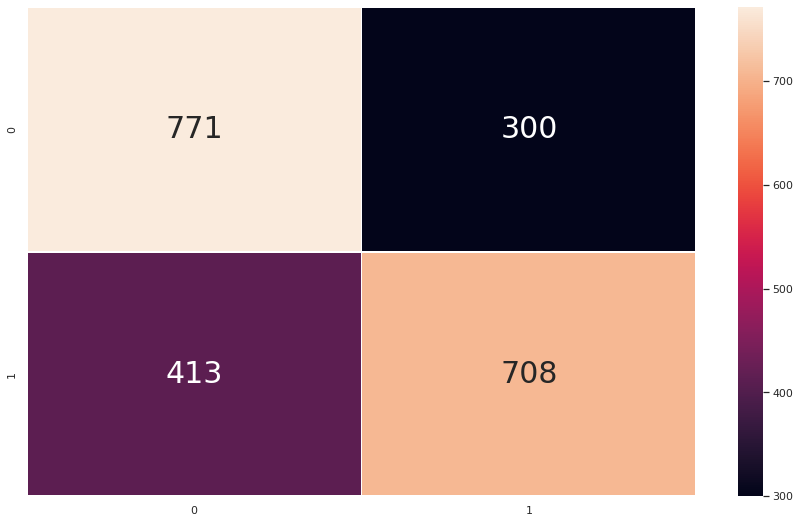

In [354]:
mlp = MLPClassifier(hidden_layer_sizes=(16,16))
mlp.fit(X_train, y_train)

print('Training accuracy:', mlp.score(X_train, y_train).round(3))
acc.append(mlp.score(X_train, y_train).round(3))

print('Test accuracy:', mlp.score(X_test, y_test).round(3))
y_hat_rf = mlp.predict(X_test)
print(classification_report(y_test, y_hat_rf))

cm = confusion_matrix(y_test, y_hat_rf)
plt.figure(figsize = (15,9))
sns.heatmap(cm, linewidths=1, annot=True, fmt='g')

In [372]:
dct = dict(zip(models, acc))
dct = dict(sorted(dct.items(), key=lambda x: x[1], reverse=True))
dct

{'KNN': 0.78, 'LR': 0.583, 'MLP': 0.696, 'SVM': 0.686, 'XGB': 0.76}

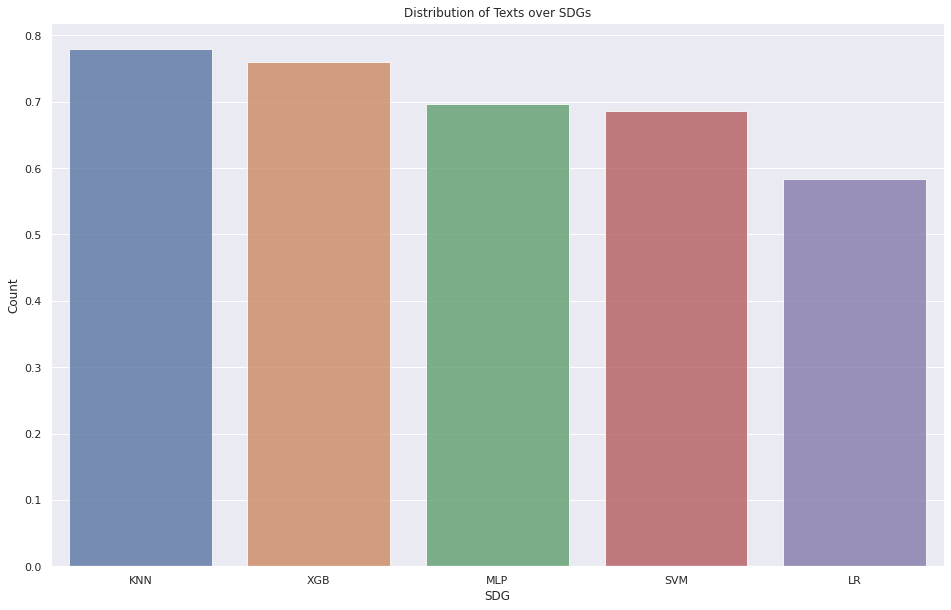

In [373]:
# total_number_of_excerpts  = df_osdg['sdg'].value_counts()


plt.figure(figsize=(16,10))
ax = sns.barplot(list(dct.keys()), list(dct.values()), alpha=0.8)

plt.title('Distribution of Texts over SDGs')
plt.xlabel('SDG', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()